# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from io import StringIO

# Connect to Drive

In [ ]:
# Connect Drive
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path to drive
file_path = '/content/drive/MyDrive/Datathon2023/Fact_Sales.csv'

# Đọc file CSV vào DataFrame
df = pd.read_csv(file_path)

# In ra một số dòng đầu tiên của DataFrame để kiểm tra
print(df.head())

     month    week  site  branch_id channel_id distribution_channel  \
0  2022001  202203  1800       1800     Online               Online   
1  2022001  202202  1105       1100       CHTT               Bán lẻ   
2  2022001  202204  1147       1100       CHTT               Bán lẻ   
3  2022001  202202  1502       1500       CHTT               Bán lẻ   
4  2022001  202204  1115       1100       CHTT               Bán lẻ   

  distribution_channel_code  sold_quantity  cost_price  net_price customer_id  \
0                       ZF2              3     3465960    4816665   02757bde1   
1                        FP              1      231200     340000   3dd717588   
2                        FP              1      238000     350000   255bcbc83   
3                        FP              1      244800     360000   948340f03   
4                        FP              1      125800     185000   0ad09228f   

                              product_id  
0  aa01577e94a049c395087645063c5275NAU42  


# RFM

In [ ]:
# loại customer null
df = df[df['customer_id'].notna()]
df.head(10)

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id
0,2022001,202203,1800,1800,Online,Online,ZF2,3,3465960,4816665,02757bde1,aa01577e94a049c395087645063c5275NAU42
1,2022001,202202,1105,1100,CHTT,Bán lẻ,FP,1,231200,340000,3dd717588,c5e8835a14e74ee2ba476536bedbd7e0DEN44
2,2022001,202204,1147,1100,CHTT,Bán lẻ,FP,1,238000,350000,255bcbc83,d62c72df8f454e3b8cb3fe9fc0c508abDEN43
3,2022001,202202,1502,1500,CHTT,Bán lẻ,FP,1,244800,360000,948340f03,4615b124d7a743d6b536515c2fb486b5DEN37
4,2022001,202204,1115,1100,CHTT,Bán lẻ,FP,1,125800,185000,0ad09228f,4cabab90b40841b4b100cdc0969742aaDOO39
5,2022001,202204,1119,1100,CHTT,Bán lẻ,FP,1,258400,380000,f426464a2,4f81ae0cfcdd49379344ffcadaae4276KEM37
6,2022001,202204,1123,1100,CHTT,Bán lẻ,FP,2,244800,360000,81c0c4b70,a42395a564364e5693b178dce514bd84NAU37
7,2022001,202201,1123,1100,CHTT,Bán lẻ,FP,1,187000,275000,81c0c4b70,f16a81511e974627880b3c979bf30252XDG34
8,2022001,202204,1522,1500,CHTT,Bán lẻ,FP,1,77350,119000,29d7e825e,ca68578665884daab8db1e4f80465309XNG34
9,2022001,202202,1203,1200,CHTT,Bán lẻ,FP,1,306000,450000,f763fca95,db0a9a9812084397b7ad5d6379f210c4DEN37


In [ ]:
import datetime
# Tinh toan RFM

# -------- Tinh R - Recency

# Chuyen tu string -> date
# Chuyển đổi cột 'week' thành kiểu dữ liệu datetime => quy về ngày
df['week'] = pd.to_datetime(df['week'].astype(str) + '-0', format='%Y%U-%w')

# Lay ngay lon nhat trong data + 1
current_date = max(df['week']) + pd.DateOffset(weeks=1)

# -------- Tinh M - MoneytaryValue
df['TotalPay'] = df['net_price'] * df['sold_quantity']
#df_not_nan['TotalPay'] = df_not_nan['SubTotal']

In [ ]:
#df_customers

# Tính Frequency bằng cách đếm số lượng giao dịch cho mỗi khách hàng trong mỗi tuần
df_customers = df.groupby(['customer_id', pd.Grouper(key='week', freq='W-Mon')]).size().reset_index(name='Frequency')

# Tính Recency bằng cách lấy ngày lớn nhất trong mỗi nhóm và tính khoảng cách đến current_date
df_customers['Recency'] = df_customers.groupby('customer_id')['week'].transform('max')
df_customers['Recency'] = (current_date - df_customers['Recency']).dt.days

# Tính MonetaryValue bằng cách nhân số lượng bán với giá trị net cho mỗi giao dịch
df_customers['MonetaryValue'] = df.groupby(['customer_id']).apply(lambda group: (group['sold_quantity'] * group['net_price']).sum()).reset_index()[0]

# Đổi tên các cột để rõ ràng
df_customers.columns = ['customer_id', 'Week', 'Frequency', 'Recency', 'MonetaryValue']

print(df_customers)

      customer_id       Week  Frequency  Recency  MonetaryValue
0       004c2ae83 2022-01-10         19      153   1.476117e+10
1       004c2ae83 2022-01-24         42      153   2.684700e+07
2       004c2ae83 2022-02-07         50      153   1.624288e+08
3       004c2ae83 2022-02-14         53      153   3.059388e+09
4       004c2ae83 2022-03-14         71      153   2.855287e+09
...           ...        ...        ...      ...            ...
35118   ffbefa0c4 2023-03-27         40      244            NaN
35119   ffbefa0c4 2023-04-03         15      244            NaN
35120   ffbefa0c4 2023-04-10         19      244            NaN
35121   ffbefa0c4 2023-04-17          2      244            NaN
35122   ffbefa0c4 2023-05-01          4      244            NaN

[35123 rows x 5 columns]


In [ ]:
df_customers.rename(columns={'transaction_date':'Recency','transaction_id':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)
df_customers.head()

,customer_id,Week,Frequency,Recency,MonetaryValue
0,004c2ae83,2022-01-10,19,153,1.476117e+10
1,004c2ae83,2022-01-24,42,153,2.684700e+07
2,004c2ae83,2022-02-07,50,153,1.624288e+08
3,004c2ae83,2022-02-14,53,153,3.059388e+09
4,004c2ae83,2022-03-14,71,153,2.855287e+09


In [ ]:
df_customers.describe()

,Frequency,Recency,MonetaryValue
count,35123.000000,35123.000000,1.191000e+03
mean,71.062352,100.640207,5.464457e+09
std,92.074539,104.828329,4.486306e+10
min,1.000000,6.000000,0.000000e+00
25%,17.000000,6.000000,9.364593e+07
50%,43.000000,153.000000,3.177010e+08
75%,90.000000,167.000000,1.695806e+09
max,2057.000000,727.000000,1.377446e+12


<ipython-input-152-3b8150daf543>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['Recency'])


Text(0.5, 0, 'Days since last purchase')

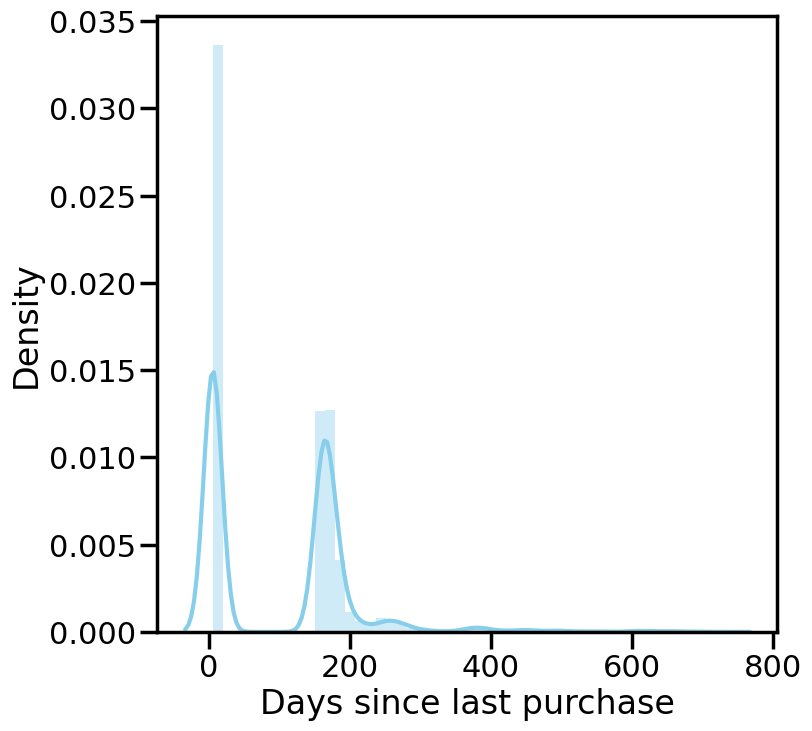

In [ ]:
# Plotting for the last day since the customer made a purchase:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['skyblue'])
sns.distplot(df_customers['Recency'])
plt.xlabel('Days since last purchase')

<ipython-input-153-864b50ecfb32>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['Frequency'])


<Axes: xlabel='Frequency', ylabel='Density'>

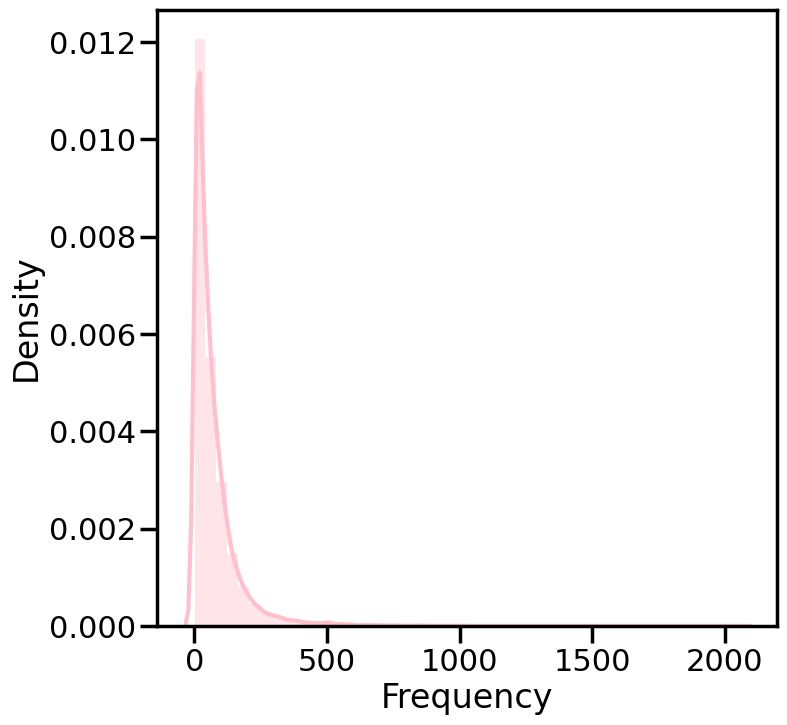

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the number of times the customer has made a purchase:
plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['pink'])
sns.distplot(df_customers['Frequency'])

<ipython-input-154-3a18a8b704bd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['MonetaryValue'])


Text(0.5, 0, 'Dollars')

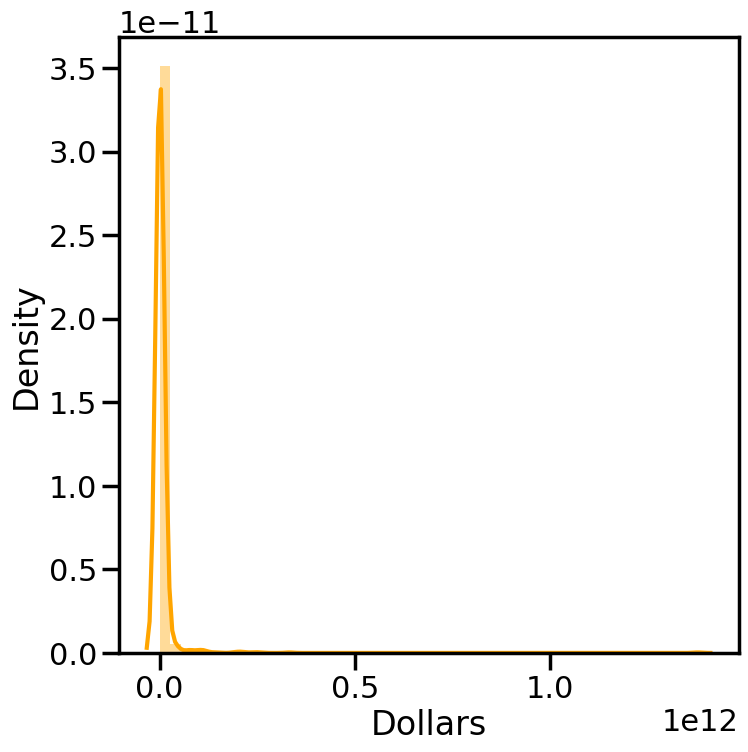

In [ ]:
# Plotting the total revenue that the particular customer brought in to the shop:
plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['orange'])
sns.distplot(df_customers['MonetaryValue'])
plt.xlabel('Dollars')

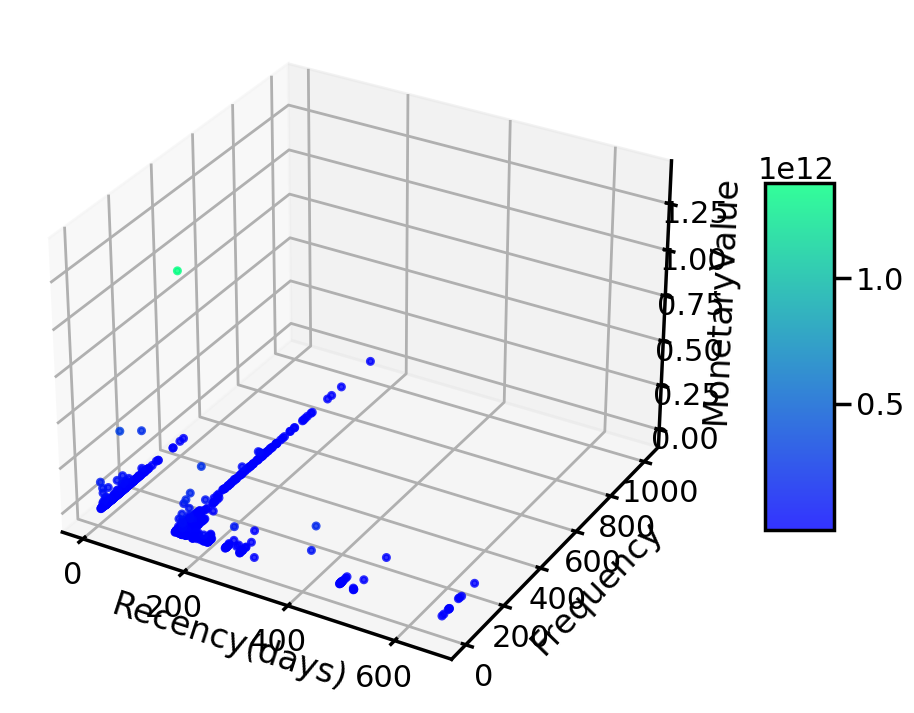

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
y = df_customers['Frequency']
x = df_customers['Recency']
z = df_customers['MonetaryValue']
ax.set_xlabel('Recency(days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
# Creating color map
my_cmap = plt.get_cmap('winter')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

<ipython-input-156-d686092d57d0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['Recency'], ax = ax[0])
<ipython-input-156-d686092d57d0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['Frequency'], ax = ax[1])
<ipython-input-156-d686092d57d0>:6: UserWarning: 

`dist

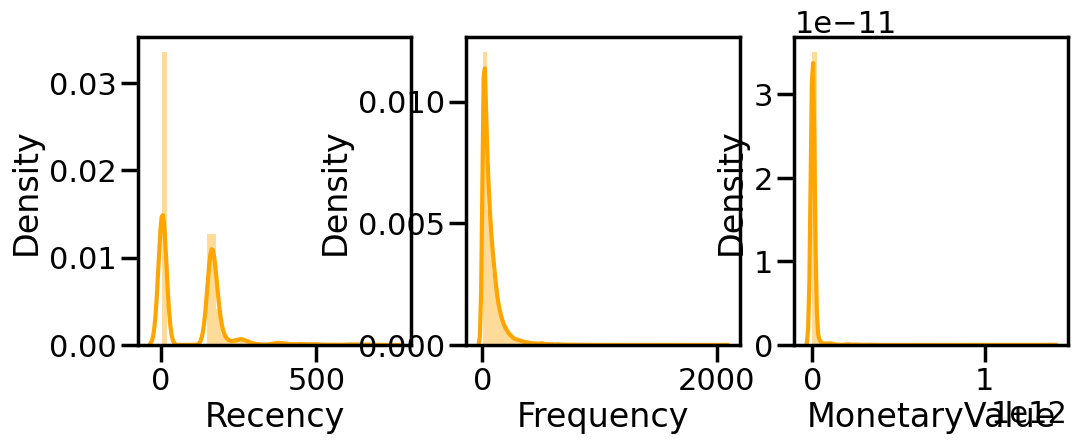

In [ ]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequency'], ax = ax[1])
sns.distplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))



<ipython-input-157-714a6033789c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers[x], ax=ax[0,0])
<ipython-input-157-714a6033789c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
<ipython-input-157-714a6033789c>:6: UserWarning: 

`distplot` is a

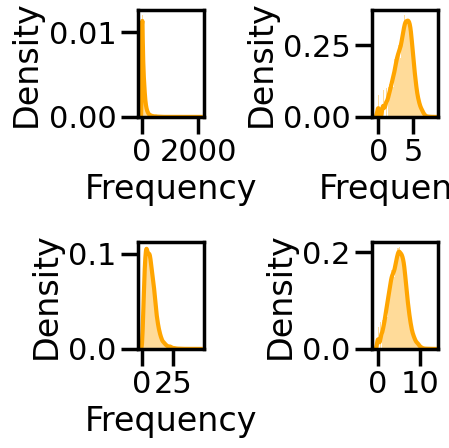

4.24
-0.44
1.31
-0.01


In [ ]:
analyze_skewness('Frequency')


<ipython-input-157-714a6033789c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers[x], ax=ax[0,0])
<ipython-input-157-714a6033789c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
<ipython-input-157-714a6033789c>:6: UserWarning: 

`distplot` is a

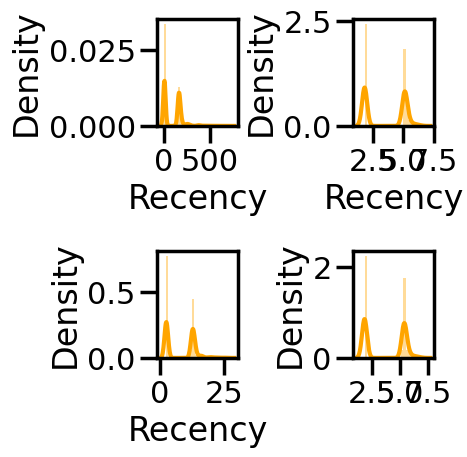

1.18
-0.02
0.21
-0.02


In [ ]:
analyze_skewness('Recency')


In [ ]:
# Tien hanh transform du lieu
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)

,Recency,Frequency,MonetaryValue
0,5.276101,3.580694,2453.052917
1,5.276101,4.801105,299.432260
2,5.276101,5.086484,545.616683
3,5.276101,5.183296,1451.704435
4,5.276101,5.680214,1418.676168
5,5.276101,5.931979,771.934399
6,5.276101,3.927255,554.343958
7,5.276101,6.409577,1108.246621
8,5.276101,6.620469,591.449605
9,5.276101,4.984473,463.586185


In [ ]:
df_customers_t.describe()

,Recency,Frequency,MonetaryValue
count,35123.000000,35123.000000,1191.000000
mean,3.701339,4.764803,945.050525
std,1.833502,1.939599,869.297798
min,1.822293,0.000000,0.000000
25%,1.822293,3.419323,454.111967
50%,5.276101,4.839246,682.348457
75%,5.372425,6.097194,1192.500960
max,7.014602,12.978111,11126.490022


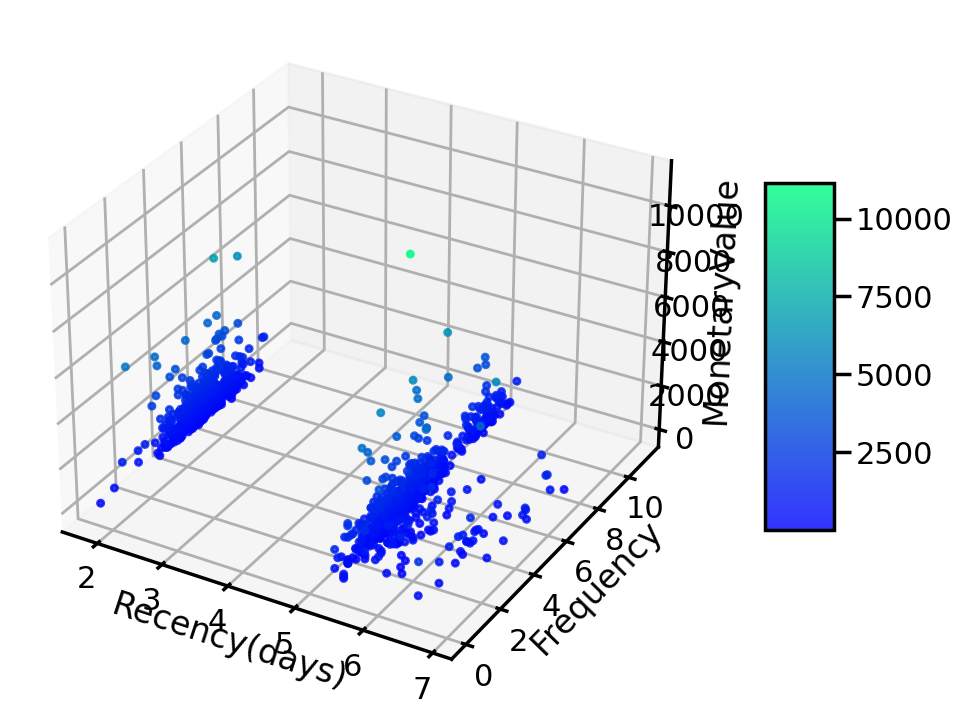

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
y = df_customers_t['Frequency']
x = df_customers_t['Recency']
z = df_customers_t['MonetaryValue']
ax.set_xlabel('Recency(days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
# Creating color map
my_cmap = plt.get_cmap('winter')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

In [ ]:
# Tien hanh scale du lieu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)


In [ ]:
dt = pd.DataFrame(df_customers_t)
dt['customer_id'] = df_customers['customer_id']
dt.rename(columns = {'0':'RecencyZ','1':'FrequencyZ','2':'MonetaryValueZ'})
dt.head(30)

,0,1,2,customer_id
0,0.858894,-0.610500,1.735465,004c2ae83
1,0.858894,0.018716,-0.743001,004c2ae83
2,0.858894,0.165852,-0.459683,004c2ae83
3,0.858894,0.215766,0.583076,004c2ae83
4,0.858894,0.471966,0.545066,004c2ae83
5,0.858894,0.601770,-0.199228,004c2ae83
6,0.858894,-0.431821,-0.449640,004c2ae83
7,0.858894,0.848009,0.187812,004c2ae83
8,0.858894,0.956740,-0.406937,004c2ae83
9,0.858894,0.113257,-0.554087,004c2ae83


In [ ]:
# Chuyển mảng numpy thành DataFrame
df_customers_t = pd.DataFrame(df_customers_t)

#df_customers_t = df_customers_t.dropna()
df_customers_t = df_customers_t.fillna(df_customers_t.mean())  # Hoặc df_customers_t.median()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

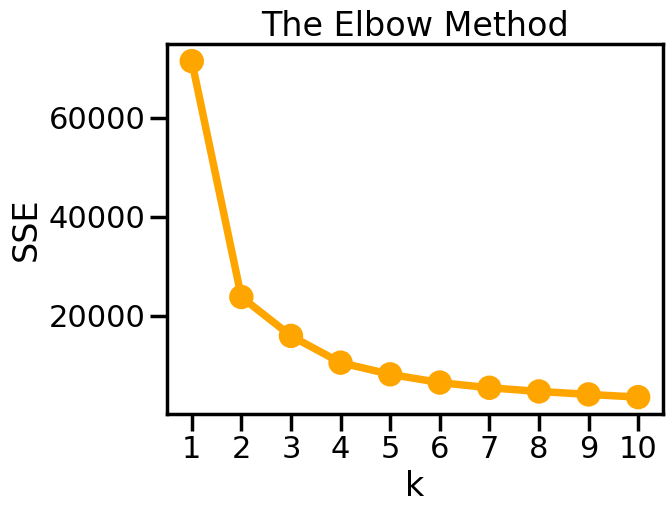

In [ ]:
# Dua du lieu vao KMeans

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
for k in range(2,11):
    labels= cluster.KMeans(n_clusters=k,init="k-means++",random_state=42).fit(df_customers_t).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "
           +str(metrics.silhouette_score(df_customers_t,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.6254301592114343


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 3 is 0.5548685835211064


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 4 is 0.5006795373605207


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 5 is 0.47906684625695733


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 6 is 0.48985488560404283


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.4836461757888227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 8 is 0.46826555140412135


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.4600099228525844


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 10 is 0.46732879297103735


In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_customers_t)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
df_customers['Cluster'] = model.labels_

In [ ]:
df_customers.to_excel('customerclustering.xlsx', index=False)

In [ ]:
nhom0 = df_customers.loc[df_customers['Cluster'] == 0]
nhom0.describe()

,Frequency,Recency,MonetaryValue,Cluster
count,9938.000000,9938.000000,3.510000e+02,9938.0
mean,10.227812,190.755484,3.407977e+09,0.0
std,5.718377,66.742915,1.509361e+10,0.0
min,1.000000,6.000000,1.666000e+05,0.0
25%,5.000000,160.000000,6.128040e+07,0.0
50%,10.000000,167.000000,2.858761e+08,0.0
75%,15.000000,181.000000,1.663204e+09,0.0
max,21.000000,727.000000,1.930962e+11,0.0


In [ ]:
nhom1 = df_customers.loc[df_customers['Cluster'] == 1]
nhom1.describe()

,Frequency,Recency,MonetaryValue,Cluster
count,9129.000000,9129.0,3.230000e+02,9129.0
mean,50.475189,6.0,3.357875e+09,1.0
std,20.912354,0.0,1.295006e+10,0.0
min,2.000000,6.0,3.050000e+05,1.0
25%,35.000000,6.0,1.000927e+08,1.0
50%,50.000000,6.0,3.183052e+08,1.0
75%,68.000000,6.0,1.675639e+09,1.0
max,87.000000,6.0,1.449196e+11,1.0


In [ ]:
nhom2 = df_customers.loc[df_customers['Cluster'] == 2]
nhom2.describe()

,Frequency,Recency,MonetaryValue,Cluster
count,7975.000000,7975.000000,2.170000e+02,7975.0
mean,182.624075,7.693166,5.336039e+09,2.0
std,127.684524,15.763657,2.861493e+10,0.0
min,88.000000,6.000000,0.000000e+00,2.0
25%,109.000000,6.000000,8.337245e+07,2.0
50%,140.000000,6.000000,3.392304e+08,2.0
75%,203.000000,6.000000,1.761845e+09,2.0
max,2057.000000,160.000000,3.324412e+11,2.0


In [ ]:
nhom3 = df_customers.loc[df_customers['Cluster'] == 3]
nhom3.describe()

,Frequency,Recency,MonetaryValue,Cluster
count,8081.000000,8081.000000,3.000000e+02,8081.0
mean,59.035268,188.458235,1.023152e+10,3.0
std,52.606334,75.468378,8.330077e+10,0.0
min,22.000000,153.000000,1.535500e+05,3.0
25%,30.000000,160.000000,1.283834e+08,3.0
50%,42.000000,167.000000,3.481651e+08,3.0
75%,66.000000,174.000000,1.774424e+09,3.0
max,452.000000,685.000000,1.377446e+12,3.0
